# GP Jax Code

In [1]:
import numpy as np
import jax
import jax.numpy as jnp
from math import pi
from matplotlib import pyplot as plt
from gp_oed_surrogate import create_gp

# Set random seed:
np.random.seed(1)

In [2]:
# Function to predict:
def f(x):
    return x * jnp.sin(x)

In [3]:
# Kernel used by GP:
def kernel(x_1, x_2, params):
    val = params["const"]*jnp.exp(-0.5*((x_2 - x_1)/params["length"])**2)
    return val

In [4]:
# Helper function to plot training data and GP predictions:
def plot_gp(x_pred, y_pred, true_fun, x_true=None, y_true=None):
    fig = plt.figure()
    mean, var = y_pred['mean'].squeeze(), y_pred['var'].squeeze()
    mean_minus_std = (mean - 3 * jnp.sqrt(var)).squeeze()
    mean_plus_std = (mean + 3 * jnp.sqrt(var)).squeeze()
    plt.plot(x_pred, true_fun(x_pred).squeeze(), 'r:', label=r'$f(x) = x\,\sin(x)$')
    if (x_true is not None) and (y_true is not None):
        plt.plot(x_true, y_true, 'r.', markersize=10, label='Observations')
    plt.plot(x_pred, mean, 'b-', label='Prediction')
    plt.fill_between(x_pred.squeeze(), mean_plus_std, mean_minus_std, alpha=.5, fc='b', ec='None', label='95% confidence interval')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.ylim(-10, 20)
    plt.legend(loc='upper left')
    fig.patch.set_facecolor('white')
    plt.show()

The noiseless case:

In [5]:
# Create noiseless dataset:
x_train = jnp.atleast_2d([1., 3., 5., 6., 7., 8.]).T
y_train = (f(x_train).ravel())
y_train = y_train.reshape(len(y_train),1)

# Train Gaussian Process model:
constraints = {"const": {">": 10**-2, "<": 10**2}, 
               "length": {">": 10**-1, "<": 10**1}}
surrogate = create_gp(kernel, x_train, y_train, constraints)

43427.8
19.88155
19.881533
19.881474
19.881233
19.880266
19.876404
19.860897
19.797651
19.022947
42.812798
16.621498
15.549626
15.525151
15.258962
15.105948
5923.4697
14.717256
14.597819
14.586017
5684.29
14.549079
14.531229
14.53128
14.523387
14.523303
14.523269
14.523274
14.523261
14.523266
14.523261
14.523261
14.52329
14.523261
14.523261
14.523259
14.523271
14.523291
14.523259
14.523259
14.523266
14.523259
14.523259
14.52329
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
14.523259
      fun: array(14.52325916)
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.63763762e-05, -2.37464905e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 56
      nit: 10
     njev: 56
   status: 0
  success: True
        x: array([22.18749931,  1.67579892])
139274.81
19.88155
15.74871
109.12827
109.139015
109.19044
109.25013
109.12827
109.12827
109.12827
109.12827
109.12827
109.12827
109

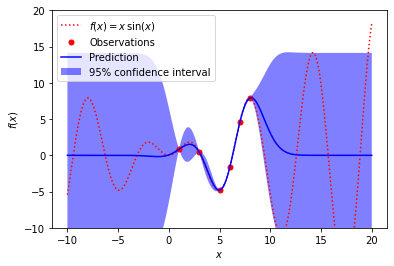

In [6]:
# Plot predictions of GP model:
x_pred =  jnp.atleast_2d(jnp.linspace(-10, 20, 1000)).T
y_pred = surrogate.predict(x_pred)
plot_gp(x_pred, y_pred, f, x_train, y_train)

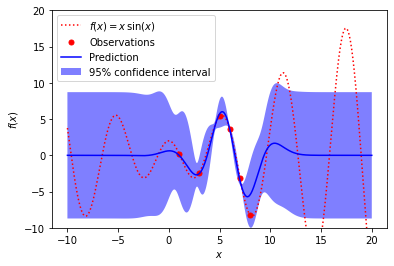

In [7]:
grad_order = 2

# Get correct solution:
grad_f = f
for _ in range(grad_order):
    grad_f = jax.jacfwd(grad_f)
grad_f = jax.vmap(grad_f, in_axes=0)
y_true = grad_f(x_train).squeeze()

# Use GP:
grad = ({'idx': [0], 'order':grad_order}, )
# grad = ({'idx': [0], 'order':1}, {'idx': [0], 'order':1})
y_pred = surrogate.predict(x_pred, grad=grad)

plot_gp(x_pred, y_pred, grad_f, x_train, y_true)

The noisy case:

In [8]:
# Create noisy dataset:
x_train = jnp.linspace(0.1, 9.9, 20)
x_train = jnp.atleast_2d(x_train).T
y_train = f(x_train).ravel()
noise = np.random.normal(loc=0, scale=0.5, size=y_train.size)
y_train += noise
# Train Gaussian Process model:
constraints = {"const": {">": 10**-2, "<": 10**2}, 
               "length": {">": 10**-1, "<": 10**1}, 
               "noise": {">":10**-1, "<":10**1}} 
surrogate = create_gp(kernel, x_train, y_train, constraints)
# Plot predictions of GP model:
x_pred = jnp.atleast_2d(jnp.linspace(0, 10, 1000)).T
y_pred = surrogate.predict(x_pred)

416.81726
63.871696
63.87153
63.870842
63.86812
63.84484
62.540092
53.376472
50.42431
51.74298
50.30207
64.717354
50.298004
49.914883
48.145157
49.51554
43.714798
39.130142
37.66896
45.19107
37.80728
37.66372
37.706886
37.62496
37.624943
37.62494
37.624886
37.624844
37.62458
37.624237
37.623154
37.619827
37.61196
37.59282
37.568756
37.688812
37.56462
37.554413
37.5439
37.543373
37.543404
37.543358
37.543396
37.543358
37.543427
37.543423
37.543358
37.543358
37.543457
37.543358
37.543358
37.543457
37.543358
37.543358
37.543457
37.543358
37.543358
37.543358
37.543358
37.543358
37.543358
37.543358
37.543472
37.543415
37.543358
37.543358
37.543415
37.543358
37.543358
37.543415
37.543358
37.543358
37.543358
37.543358
37.543358
37.543358
37.543358
37.543358
37.543358
37.543358
37.543358
37.543358
      fun: array(37.54335785)
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.23254955e-04,  6.38961792e-05, -6.47544861e-04])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'

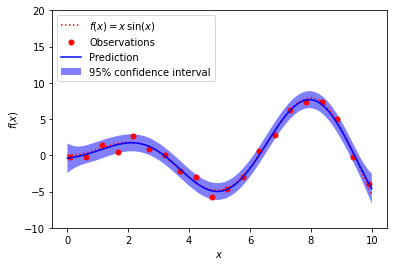

In [9]:
# Plot fitted GP:
plot_gp(x_pred, y_pred, f, x_train, y_train)

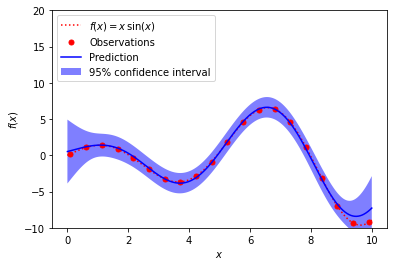

In [11]:
grad_order = 1

# Get correct solution:
grad_f = f
for _ in range(grad_order):
    grad_f = jax.jacfwd(grad_f)
grad_f = jax.vmap(grad_f, in_axes=0)
y_true = grad_f(x_train).squeeze()

# Use GP:
grad = ({'idx': [0], 'order':grad_order}, )
y_pred = surrogate.predict(x_pred, grad=grad)

plot_gp(x_pred, y_pred, grad_f, x_train, y_true)

# Comparison with GP Tools

In [ ]:
!pip install gptools

In [1]:
def plot_gptools(x_pred, mean, var, true_fun, x_true=None, y_true=None):
    fig = plt.figure()
    mean_minus_std = (mean - 3 * jnp.sqrt(var)).squeeze()
    mean_plus_std = (mean + 3 * jnp.sqrt(var)).squeeze()
    plt.plot(x_pred, true_fun(x_pred).squeeze(), 'r:', label=r'$f(x) = x\,\sin(x)$')
    if (x_true is not None) and (y_true is not None):
        plt.plot(x_true, y_true, 'r.', markersize=10, label='Observations')
    plt.plot(x_pred, mean, 'b-', label='Prediction')
    plt.fill_between(x_pred.squeeze(), mean_plus_std, mean_minus_std, alpha=.5, fc='b', ec='None', label='95% confidence interval')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.ylim(-10, 20)
    plt.legend(loc='upper left')
    fig.patch.set_facecolor('white')
    plt.show()

In [6]:
import gptools

# Noiseless case:
x_train = jnp.atleast_2d([1., 3., 5., 6., 7., 8.]).T
y_train = (f(x_train).ravel())
y_train = y_train.reshape(len(y_train),1)

gp = gptools.GaussianProcess(gptools.SquaredExponentialKernel(param_bounds=[(0, 20), (0, 5)]))
gp.add_data(x_train, y_train.squeeze(), n=0)
gp.optimize_hyperparameters(verbose=True)

/home/mabilton/.local/lib/python3.8/site-packages/gptools/kernel/core.py:415: RuntimeWarning: divide by zero encountered in true_divide
  tau_over_l = tau / l_mat
/home/mabilton/.local/lib/python3.8/site-packages/gptools/kernel/core.py:415: RuntimeWarning: divide by zero encountered in true_divide
  tau_over_l = tau / l_mat
/home/mabilton/.local/lib/python3.8/site-packages/gptools/kernel/core.py:415: RuntimeWarning: divide by zero encountered in true_divide
  tau_over_l = tau / l_mat
/home/mabilton/.local/lib/python3.8/site-packages/gptools/kernel/core.py:415: RuntimeWarning: divide by zero encountered in true_divide
  tau_over_l = tau / l_mat
/home/mabilton/.local/lib/python3.8/site-packages/gptools/kernel/core.py:415: RuntimeWarning: invalid value encountered in true_divide
  tau_over_l = tau / l_mat
/home/mabilton/.local/lib/python3.8/site-packages/gptools/kernel/core.py:415: RuntimeWarning: invalid value encountered in true_divide
  tau_over_l = tau / l_mat
/home/mabilton/.local/li

Got 12 completed starts, optimal result is:
     fun: 55.96980360507118
     jac: array([-0.00043964, -0.00127792])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([4.71092716, 1.67587924])

LL	-56
sigma_f	4.71
l_1	1.68


(     fun: 55.96980360507118
      jac: array([-0.00043964, -0.00127792])
  message: 'Optimization terminated successfully'
     nfev: 35
      nit: 10
     njev: 10
   status: 0
  success: True
        x: array([4.71092716, 1.67587924]),
 12)

a


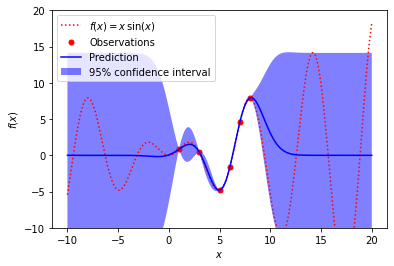

In [8]:
grad_order = 0

grad_f = f
for _ in range(grad_order):
    grad_f = jax.jacfwd(grad_f)
grad_f = jax.vmap(grad_f, in_axes=0)
y_true = grad_f(x_train).squeeze()
print('a')
x_pred =  jnp.atleast_2d(jnp.linspace(-10, 20, 1000)).T
y_star, err_y_star = gp.predict(x_pred, n=grad_order)
plot_gptools(x_pred, y_star, err_y_star**2, grad_f, x_train, y_true)